In [1]:
#importing the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 

In [2]:
#read the student performance dataset
df = pd.read_csv('student-por.csv', sep=";") 

In [3]:
#checking the data description
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [4]:
#lets check the data types
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [5]:
#looks like we don't have any missing values in our dataset
print("Missing values in our dataset: \n", df.isnull().sum().sort_values(ascending=False))
print("total records are", df.shape[0])
print("total columns are", df.shape[1])

Missing values in our dataset: 
 G3            0
schoolsup     0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
famsup        0
G2            0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
school        0
dtype: int64
total records are 649
total columns are 33


In [6]:
#checking unique values of categories
cat_features = [c for c in df.columns if df[c].dtype in ['object']]
print("Categorical Columns Unique values \n", df[cat_features].nunique())

Categorical Columns Unique values 
 school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64


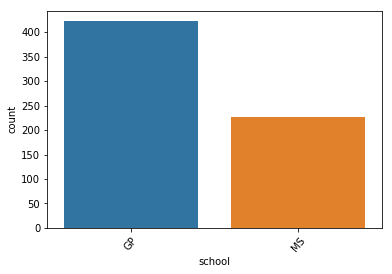

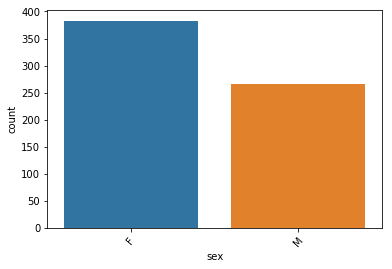

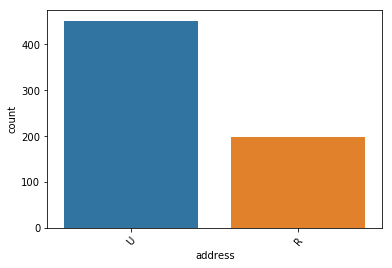

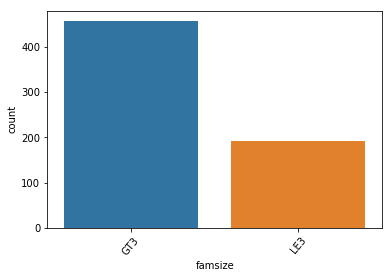

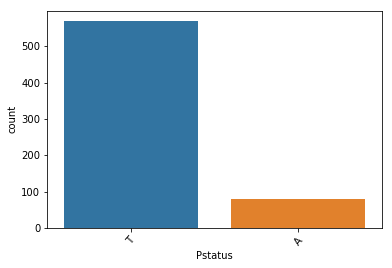

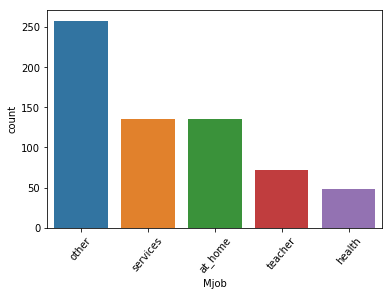

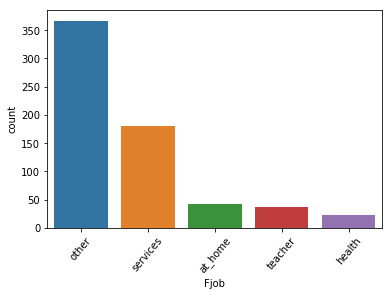

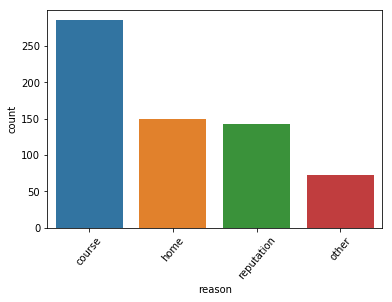

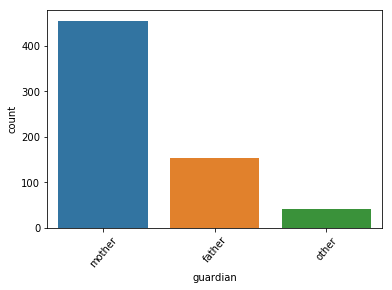

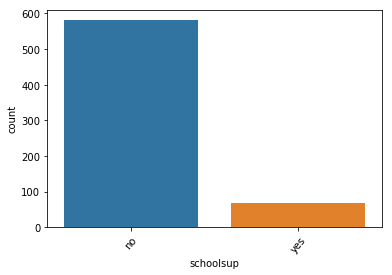

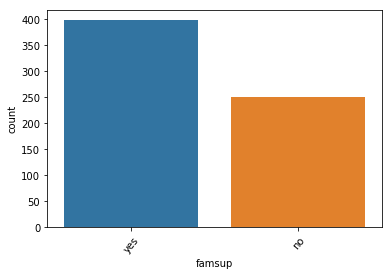

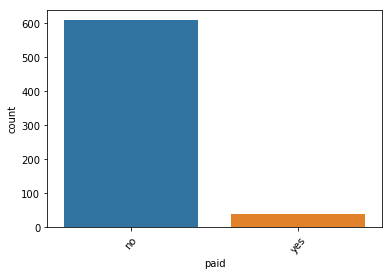

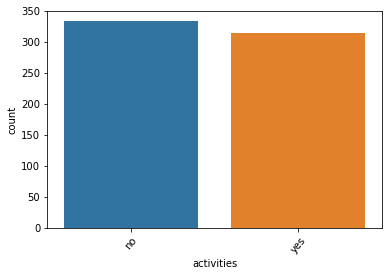

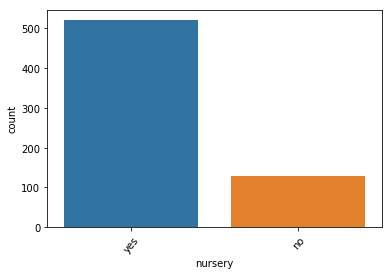

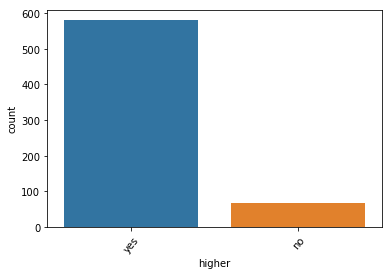

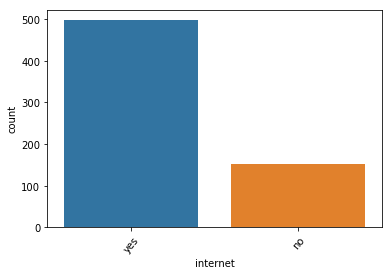

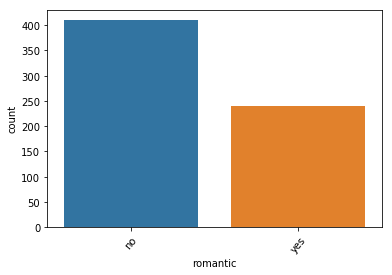

In [7]:
#plot the count of values in categorical features
for i in cat_features:
    sns.countplot(data=df, x=i, order=pd.value_counts(df[i]).iloc[:5].index)
    plt.xticks(rotation=50)
    plt.show()

In [8]:
#lets take in numeric features and check their unique values
float_features = [c for c in df.columns if df[c].dtype in ['float64', 'int64']]
print("Numeric Columns Unique values \n", df[float_features].nunique())

Numeric Columns Unique values 
 age            8
Medu           5
Fedu           5
traveltime     4
studytime      4
failures       4
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      24
G1            17
G2            16
G3            17
dtype: int64


C:\Users\hamza\Anaconda2\envs\py36\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


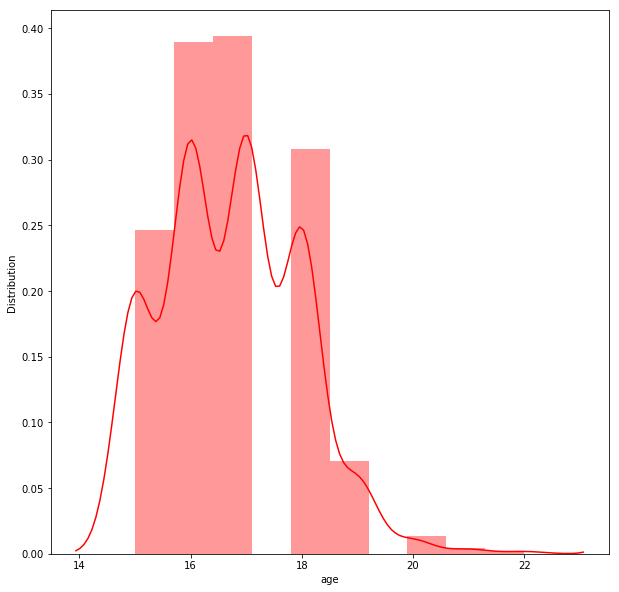

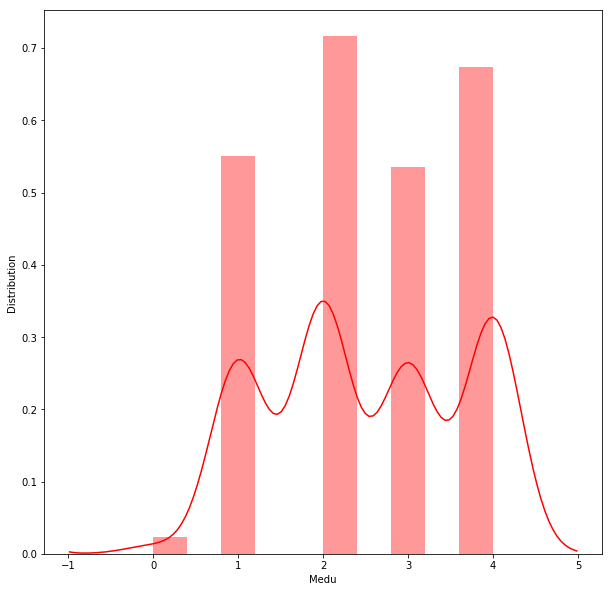

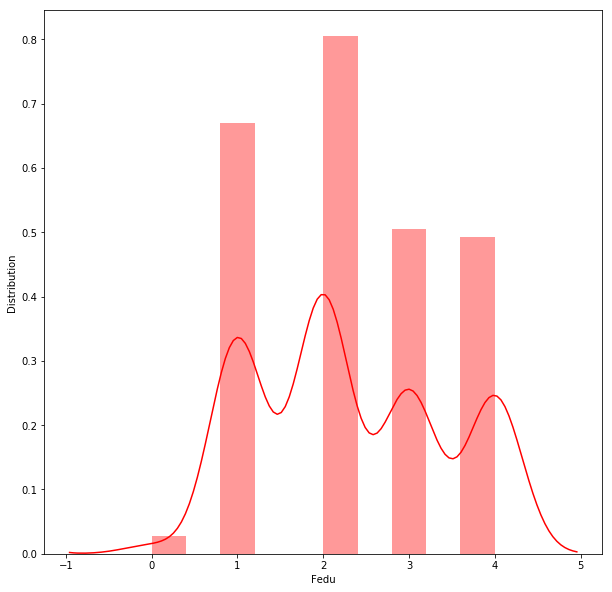

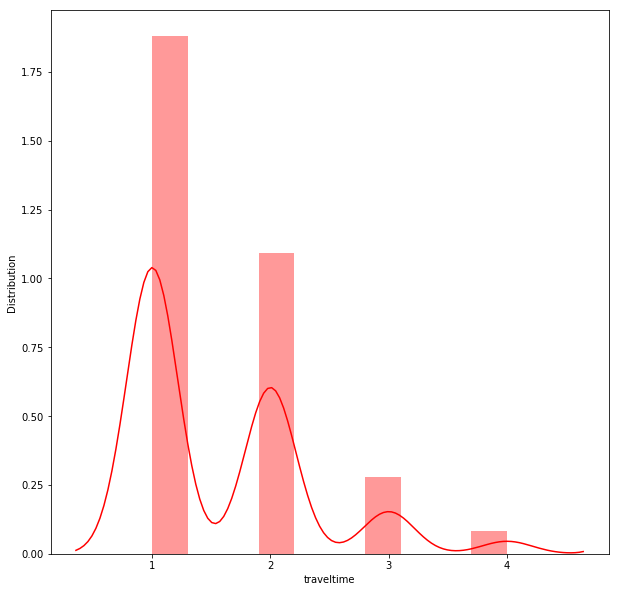

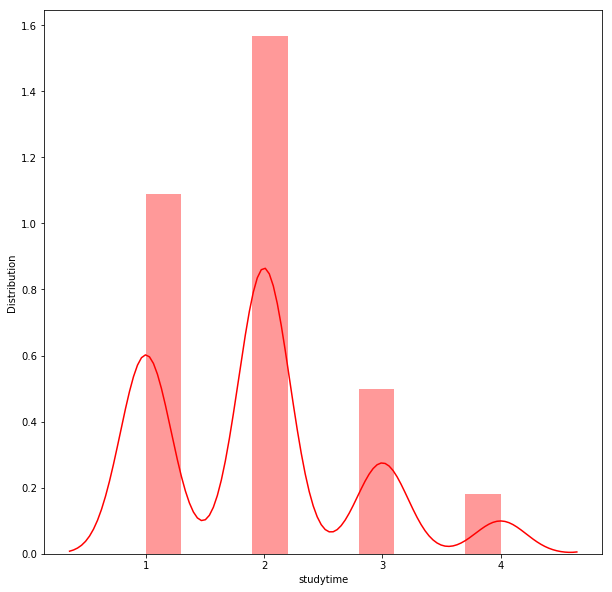

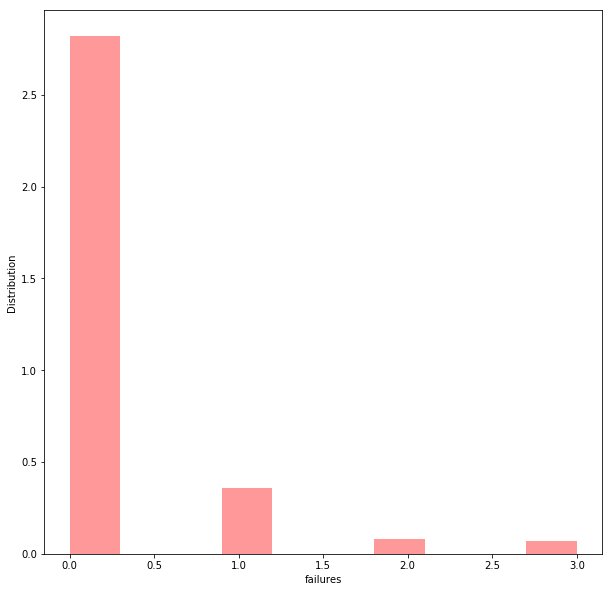

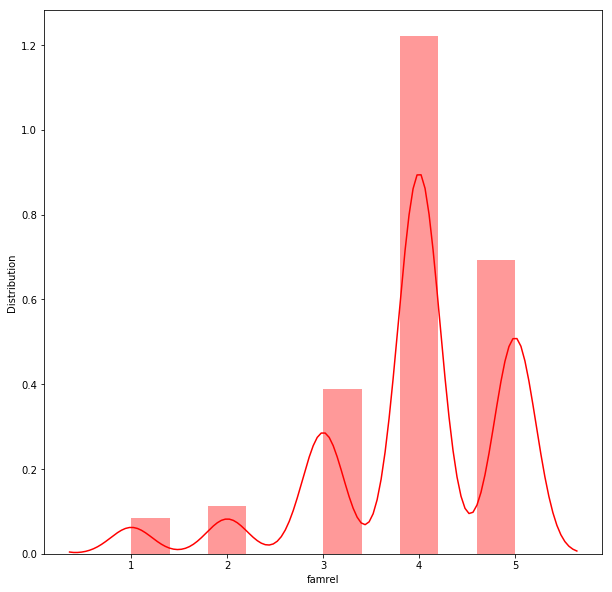

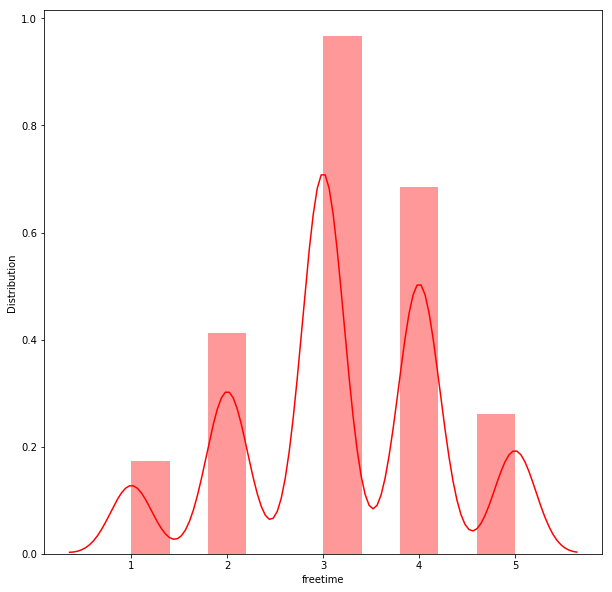

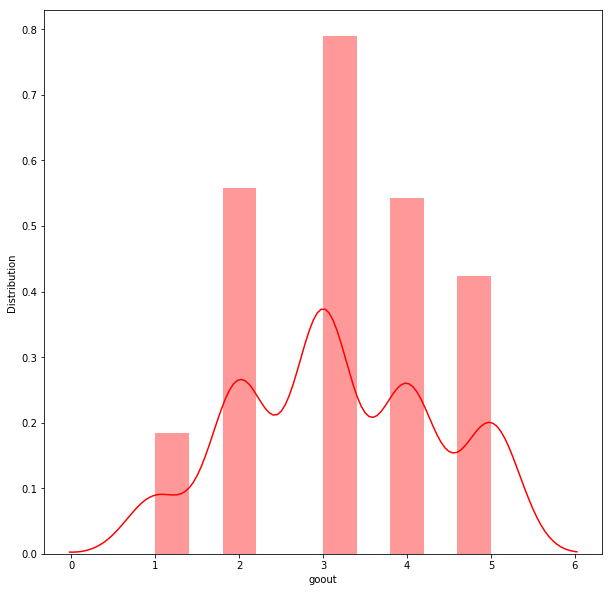

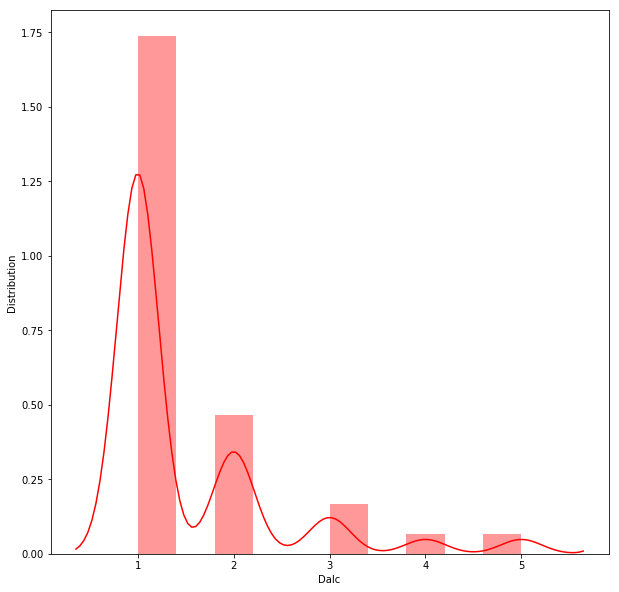

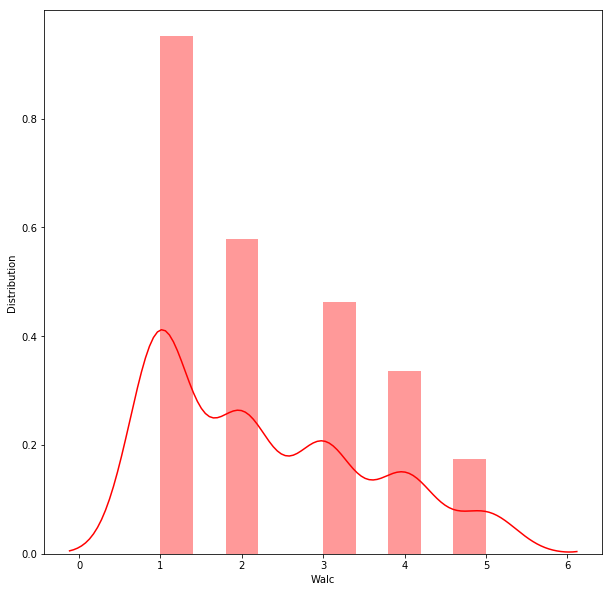

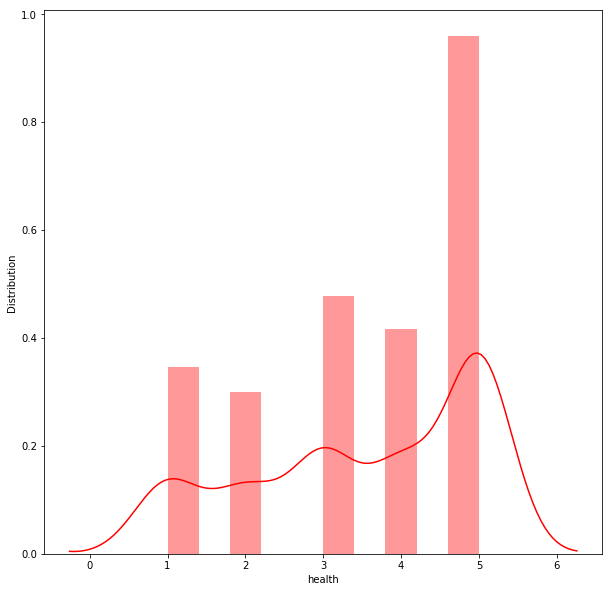

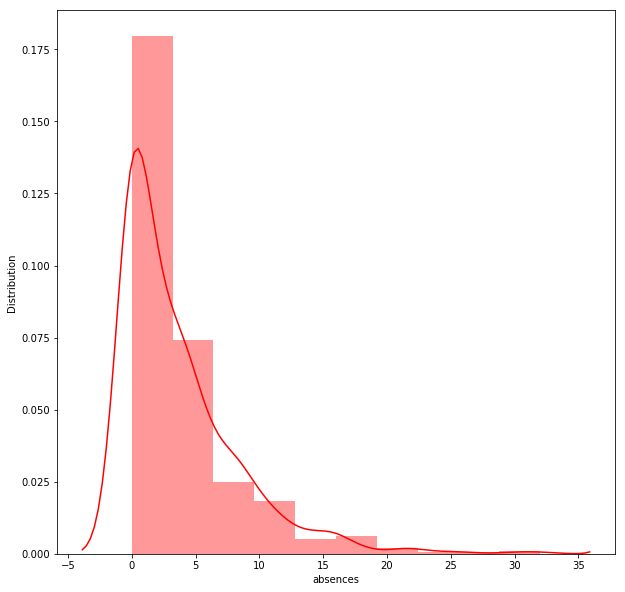

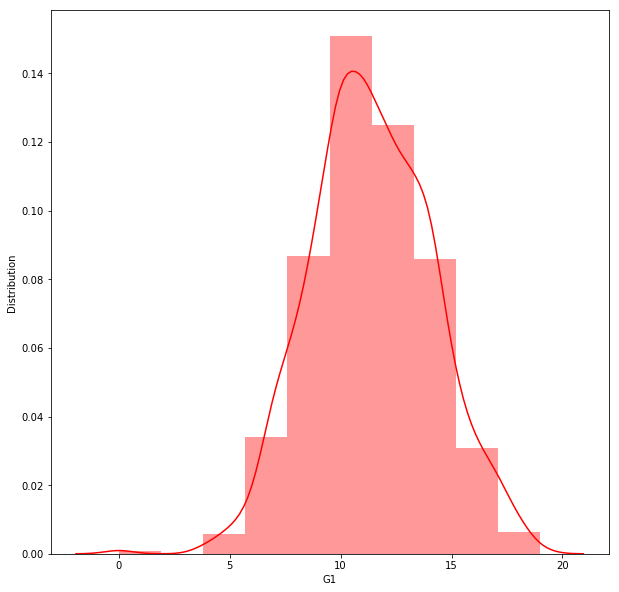

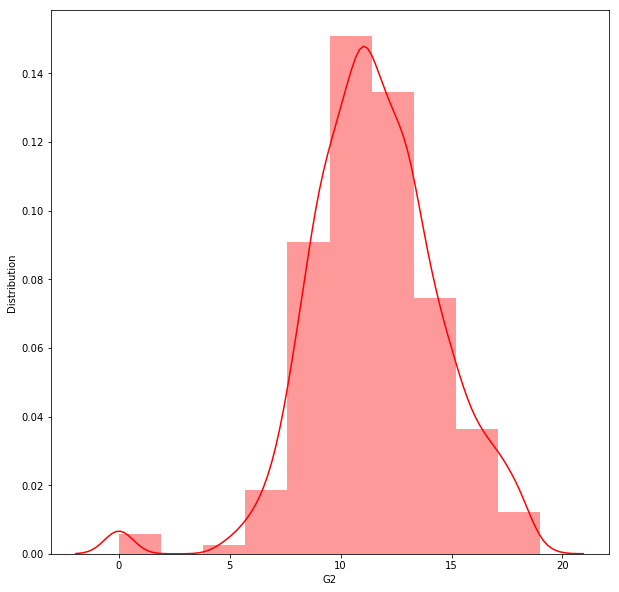

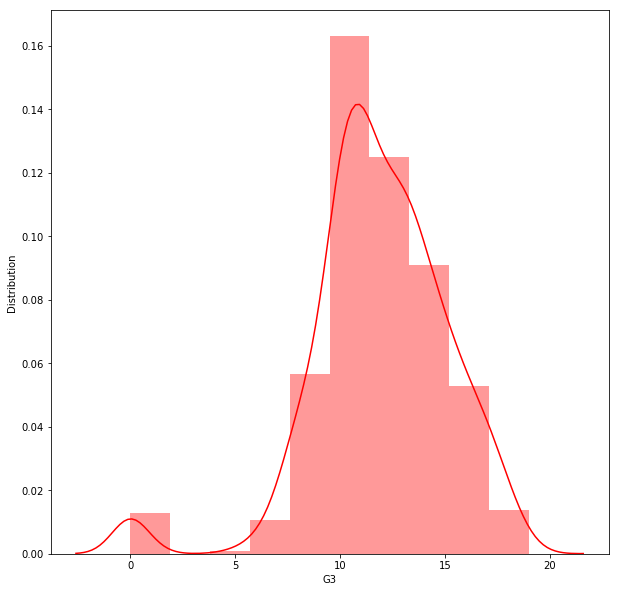

In [9]:
#lets check for distribution in the dataset
for i in float_features:
    plt.figure(figsize=(10,10))
    sns.distplot(df[i],hist=True, kde=True, color='red', bins = 10)
    plt.ylabel('Distribution')

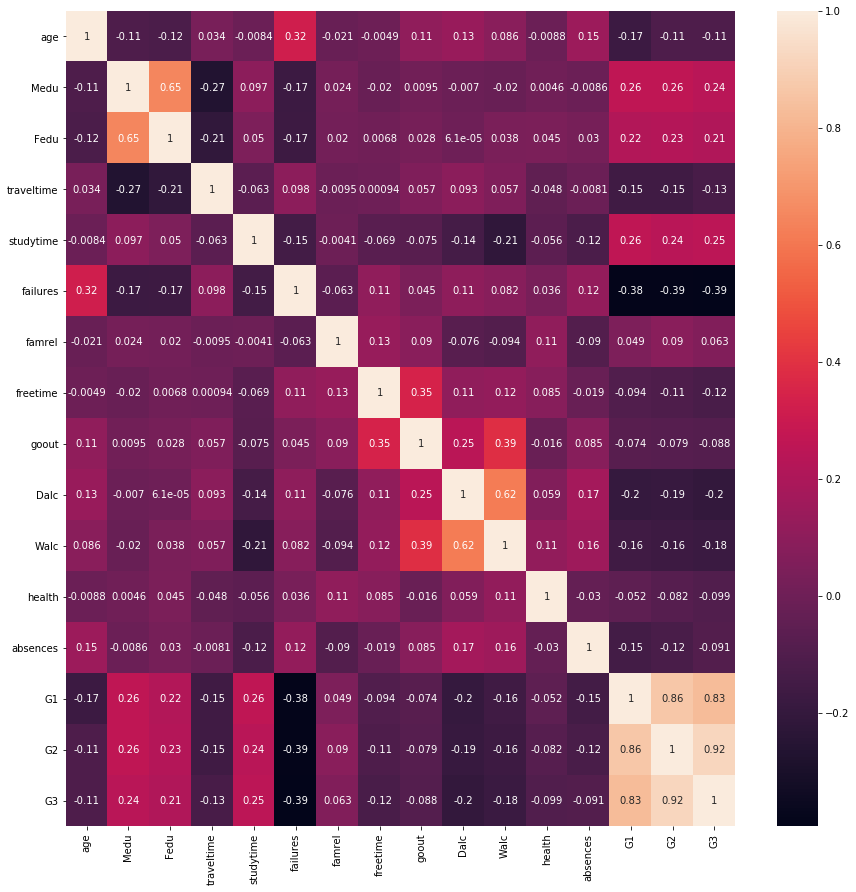

In [10]:
#lets check correlation with our target variable g3
#g1 and g2 have very high correlation so lets check for multi multicollinearity
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

          G2        G1
G3  0.918548  0.826387


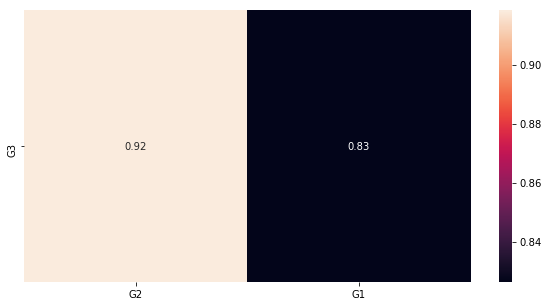

In [11]:
#checking correlation of G3 with G2 and G1
fig,ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.corr().loc[['G3'],['G2','G1']],annot=True)
print(df.corr().loc[['G3'],['G2','G1']])

          G1
G2  0.864982


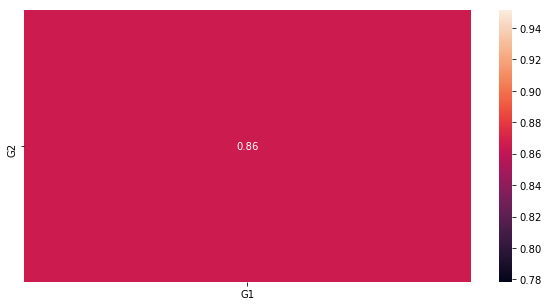

In [12]:
#checking correlation of G1 with G2 and we can observe that there is extremely high correlation so we will drop G1
fig,ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.corr().loc[['G2'],['G1']],annot=True)
print(df.corr().loc[['G2'],['G1']])

In [13]:
#lets drop G1 and keep G2
df.drop(['G1'], axis=1, inplace=True)

In [14]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,no,5,4,2,1,2,5,4,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,1,1,4,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,1,1,1,1,1,5,6,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,6,10,10


In [15]:
df.G3.value_counts()

11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
0      15
18     15
7      10
6       3
19      2
5       1
1       1
Name: G3, dtype: int64

In [16]:
df.G3.describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

In [17]:
#lets convert G3 into classification based on threshold of 12. 
# 12 and over is 1 meaning should NOT be retained and less than 12 is 0 meaning should be 
#focused on retaining
df['G3'].values[df['G3'] < 12] = 0
df['G3'].values[df['G3'] >= 12] = 1

In [18]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,13,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,no,5,4,2,1,2,5,4,11,0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,1,1,4,15,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,1,1,1,1,1,5,6,12,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,6,10,0


In [19]:
df.G3.describe()

count    649.000000
mean       0.536210
std        0.499072
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: G3, dtype: float64

In [20]:
df.G3.value_counts()

1    348
0    301
Name: G3, dtype: int64

Text(0,0.5,'Counts')

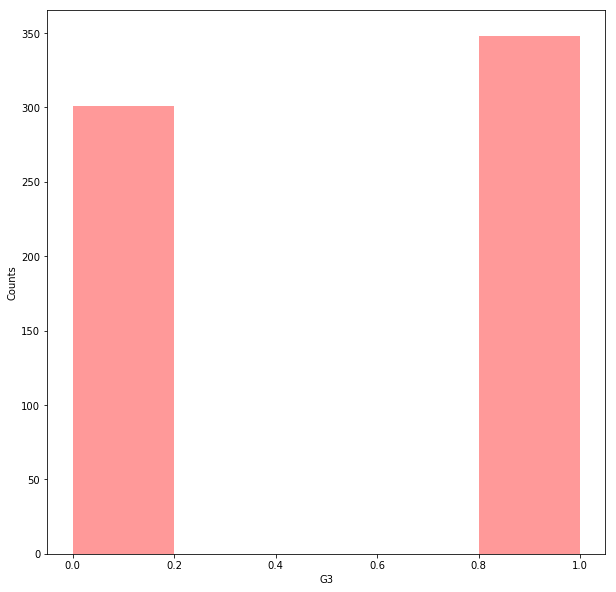

In [21]:
#lets check how our target variable is distributed
plt.figure(figsize=(10,10))
sns.distplot(df['G3'],hist=True, kde=False, color='Red')
plt.ylabel('Counts')

In [22]:
#lets take dummy variables of cat columns and remove the original cat columns
cat_types = pd.get_dummies(df[cat_features])
performance_df = pd.concat([df, cat_types], axis=1)
    
performance_df = performance_df[[x for x in list(performance_df) if x not in cat_features]]

In [23]:
performance_df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G2', 'G3',
       'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')

In [24]:
#we split 30% for testing and 70% for training while keeping random state for reproductivity
x = performance_df.drop(['G3'],axis=1)
y = performance_df['G3']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.3, random_state=10)

In [25]:
#lets check decision tree classifier cross validation scores alone first
tree_model = DecisionTreeClassifier(max_depth=1)
cv_scores = cross_val_score(tree_model, x_train, y_train, cv=10, scoring = 'accuracy')

Text(0,0.5,'Cross-validated accuracy')

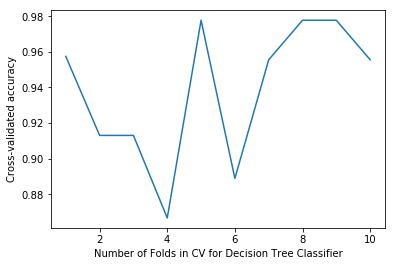

In [26]:
#we can see that the accuracy was the highest on the second fold of cross validation and lowest on 6th
plt.plot(range(1, 11), cv_scores)
plt.xlabel('Number of Folds in CV for Decision Tree Classifier')
plt.ylabel('Cross-validated accuracy')

In [27]:
#get the mean of all cross validation folds 
print("Accuracy of Model with Cross Validation is:",cv_scores.mean() * 100)

Accuracy of Model with Cross Validation is: 93.83533765032377


Log_Regression
                    precision    recall  f1-score   support

    Risky Students       0.85      0.90      0.88        90
Not Risky Students       0.91      0.87      0.89       105

         micro avg       0.88      0.88      0.88       195
         macro avg       0.88      0.88      0.88       195
      weighted avg       0.88      0.88      0.88       195

[[81  9]
 [14 91]]
                   Coeffecient
age                  -0.514865
Medu                 -0.237464
Fedu                  0.213782
traveltime            0.160771
studytime            -0.036104
failures             -0.881920
famrel               -0.145472
freetime             -0.334826
goout                -0.138057
Dalc                 -0.073818
Walc                 -0.037414
health               -0.009551
absences             -0.099453
G2                    1.872142
school_GP            -0.690050
school_MS            -0.439865
sex_F                -0.029618
sex_M                -1.100296
address_R     

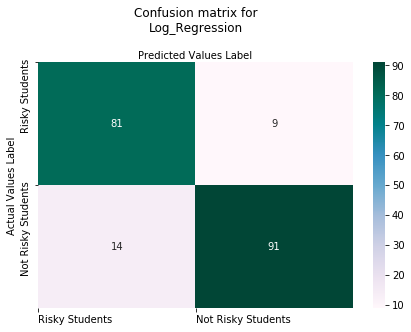

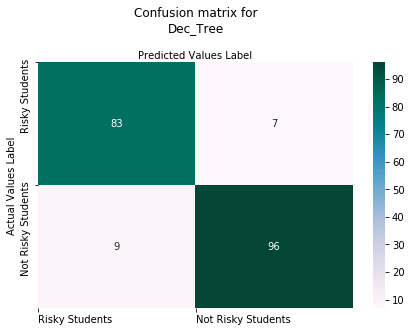

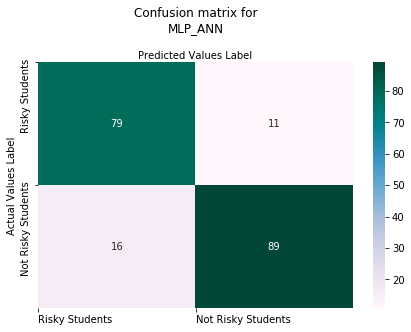

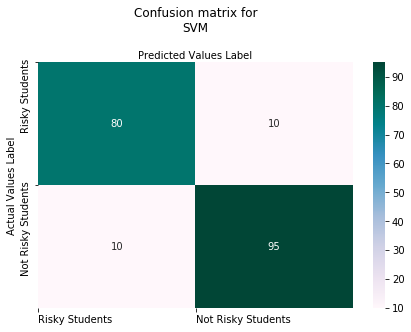

In [28]:
#define all of our models
models = [
          ('Log_Regression', LogisticRegression(solver='liblinear')), 
          ('Dec_Tree', DecisionTreeClassifier(max_depth=5)),
          ('MLP_ANN', MLPClassifier(hidden_layer_sizes=(256,128,128, 32),activation="relu",random_state=1)),
          ('SVM', SVC(kernel = 'linear', gamma='scale'))
        ]
#we keep list of dfs, results, names
dfs = []
results = []
names = []
target_names = ['Risky Students', 'Not Risky Students'] #0 are students at risk of leaving, 1 not risky
for name, model in models:
    #apply 10 split kfold on models
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=100)
    #cross validate all models and return training score for all
    cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, return_train_score=True)
    #fit all models on x and y train
    clf = model.fit(x_train, y_train)
    #apply predictions on x test for all models
    y_pred = clf.predict(x_test)
    #print the name of all the models involved
    print(name)
    #we create a classification for all the models on the actual and predicted values
    classification = classification_report(y_test, y_pred, target_names = target_names)
    #print the classification report
    print(classification)
    #we create confusion matrix for all the models on actual and predicted values
    confusion_matrix_students = confusion_matrix(y_test, y_pred)
    #print array of confusion matrix
    print(confusion_matrix_students)
    #lets plot the confusion matrix now by creating sub plots
    fig, ax = plt.subplots()
    # create heatmap for confusion matrix after setting the x and y ticks
    sns.heatmap(pd.DataFrame(confusion_matrix_students), annot=True, cmap="PuBuGn" ,fmt='g')
    #We set the title of confusion matrix and model name on top of image
    ax.xaxis.set_label_position("top")
    students_ticks = np.arange(len(target_names))
    #We plot the confusion matrix with the ticks being the target names 0 is Student at Risk of Leaving
    #1 is student not at risk of leaving
    plt.xticks(students_ticks, target_names, ha='left', linespacing = 0.2)
    plt.yticks(students_ticks, target_names, ma='right')
    plt.tight_layout()
    plt.title('Confusion matrix for\n' + name, y=1.1)
    plt.ylabel('Actual Values Label')
    plt.xlabel('Predicted Values Label')
    results.append(cv_results)
    names.append(name)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    #the final dataframe has the model names, model training scores, testing scores, score time and fit time
    final = pd.concat(dfs, ignore_index=True)
    # get importance from each algorithm and since decision tree has different method of getting features
    #we use the if statement to match the model name to their feature importance func
    if name == 'Log_Regression':
        importance = clf.coef_[0]
        coeffecients = pd.DataFrame(importance, x_train.columns)
        coeffecients.columns = ['Coeffecient']
        print(coeffecients)
    if name == 'Dec_Tree':
        importances = np.round(clf.feature_importances_,3)
        coeffecients = pd.DataFrame(importances, x_train.columns) 
        coeffecients.columns = ['Coeffecient']
        print(coeffecients)
    if name == 'SVM':
        importances = np.round(clf.coef_[0],3)
        coeffecients = pd.DataFrame(importances, x_train.columns)
        coeffecients.columns = ['Coeffecient']
        print(coeffecients)
        

In [29]:
final

,fit_time,score_time,test_score,train_score,model
0,0.025998,0.013995,0.891304,0.943627,Log_Regression
1,0.003996,0.002001,0.847826,0.943627,Log_Regression
2,0.004997,0.000999,0.956522,0.936275,Log_Regression
3,0.004996,0.002998,0.782609,0.948529,Log_Regression
4,0.005996,0.001000,0.955556,0.936430,Log_Regression
5,0.004998,0.000999,0.911111,0.941320,Log_Regression
6,0.003996,0.001000,0.955556,0.931540,Log_Regression
7,0.003997,0.000999,0.955556,0.938875,Log_Regression
8,0.004996,0.001000,0.911111,0.948655,Log_Regression
9,0.005015,0.001001,0.911111,0.938875,Log_Regression


Text(0.5,1,'Comparison of Model by Classification Algorithm Training Scores')

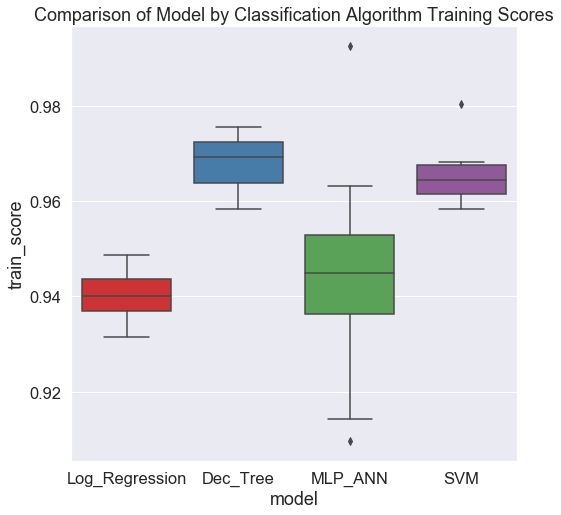

In [30]:
#we plot the training score with the model names
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.5)
sns.boxplot(x=final['model'], y=final["train_score"], palette="Set1")
plt.title('Comparison of Model by Classification Algorithm Training Scores')


Text(0.5,1,'Comparison of Model by Classification Algorithm Test Scores')

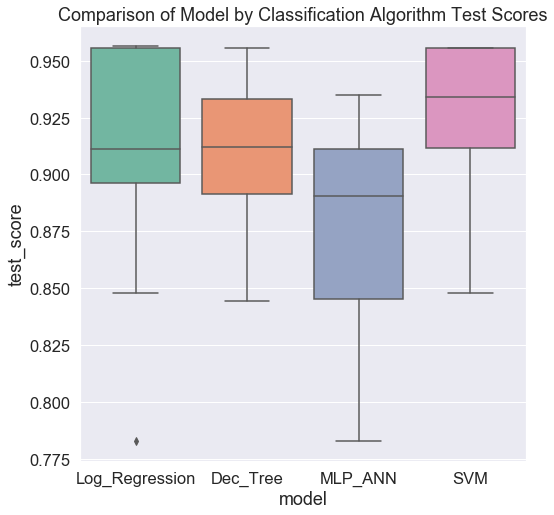

In [31]:
#we plot the test score for each model
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.5)
sns.boxplot(x=final['model'], y=final["test_score"], palette="Set2")
plt.title('Comparison of Model by Classification Algorithm Test Scores')